## Cluster confusion matrix

In [8]:
a = [174815,   6143,  25971,   1845,   1186,    851,   4735]
[((sum(a)/aa) ** 2) ** 0.5 for aa in a]

[1.2329948803020336,
 35.088067719355365,
 8.299487890339224,
 116.8271002710027,
 181.74198988195616,
 253.2855464159812,
 45.52185850052798]

In [6]:
253.29 / 1.23

205.9268292682927

In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
K = 7

cx_name = ['None', 'interstitial lung disease', 'Renal compromise', 'Malignancy of lung', 'PAH', 'Lymphoma', 'Thrombocytopenia']
group_name = [str(i) for i in range(K)]

In [4]:
# 49.0 9332.0 16442.0 13533.0 11187.0 6133.0 14738.0
# 2.0 323.0 378.0 301.0 137.0 389.0 212.0
# 464.0 931.0 1536.0 614.0 341.0 1053.0 1055.0
# 0.0 62.0 74.0 37.0 15.0 143.0 19.0
# 3.0 72.0 94.0 32.0 13.0 73.0 51.0
# 2.0 72.0 62.0 60.0 54.0 82.0 6.0
# 0.0 239.0 490.0 217.0 160.0 160.0 298.0

In [5]:
# [6256.0, 5217.0, 23043.0, 26.0, 21329.0, 5251.0, 10287.0],
# [77.0, 171.0, 361.0, 2.0, 427.0, 347.0, 357.0],
# [235.0, 829.0, 1249.0, 537.0, 1328.0, 928.0, 891.0],
# [3.0, 27.0, 26.0, 0.0, 73.0, 125.0, 96.0],
# [17.0, 61.0, 66.0, 0.0, 56.0, 85.0, 53.0],
# [32.0, 19.0, 46.0, 0.0, 97.0, 85.0, 59.0],
# [82.0, 170.0, 487.0, 1.0, 475.0, 140.0, 209.0]

In [6]:
# 15432.0 18300.0 4505.0 14192.0 7678.0 47.0 11260.0
# 369.0 270.0 90.0 198.0 446.0 2.0 367.0
# 1167.0 663.0 775.0 800.0 1252.0 460.0 877.0
# 57.0 38.0 22.0 19.0 155.0 0.0 59.0
# 77.0 28.0 34.0 41.0 83.0 2.0 73.0
# 66.0 81.0 8.0 9.0 89.0 2.0 83.0
# 446.0 266.0 120.0 277.0 201.0 0.0 254.0

In [7]:
cluster = np.array([
    [15432.0, 18300.0, 4505.0, 14192.0, 7678.0, 47.0, 11260.0],
    [369.0, 270.0, 90.0, 198.0, 446.0, 2.0, 367.0],
    [1167.0, 663.0, 775.0, 800.0, 1252.0, 460.0, 877.0],
    [57.0, 38.0, 22.0, 19.0, 155.0, 0.0, 59.0],
    [77.0, 28.0, 34.0, 41.0, 83.0, 2.0, 73.0],
    [66.0, 81.0, 8.0, 9.0, 89.0, 2.0, 83.0],
    [446.0, 266.0, 120.0, 277.0, 201.0, 0.0, 254.0]
]).astype(float)

print(np.sum(cluster, axis=0))

cluster_by_group = cluster / cluster.sum(axis=1, keepdims=True)
cluster_by_cx = cluster / cluster.sum(axis=0, keepdims=True)

cluster_by_group

[17614. 19646.  5554. 15536.  9904.   513. 12973.]


array([[0.21609208, 0.25625228, 0.06308287, 0.19872854, 0.10751393,
        0.00065813, 0.15767217],
       [0.21182549, 0.15499426, 0.05166475, 0.11366246, 0.25602755,
        0.00114811, 0.21067738],
       [0.19469469, 0.11061061, 0.12929596, 0.1334668 , 0.20887554,
        0.07674341, 0.14631298],
       [0.16285714, 0.10857143, 0.06285714, 0.05428571, 0.44285714,
        0.        , 0.16857143],
       [0.22781065, 0.08284024, 0.10059172, 0.12130178, 0.24556213,
        0.00591716, 0.21597633],
       [0.19526627, 0.23964497, 0.02366864, 0.02662722, 0.26331361,
        0.00591716, 0.24556213],
       [0.28516624, 0.17007673, 0.07672634, 0.17710997, 0.12851662,
        0.        , 0.16240409]])

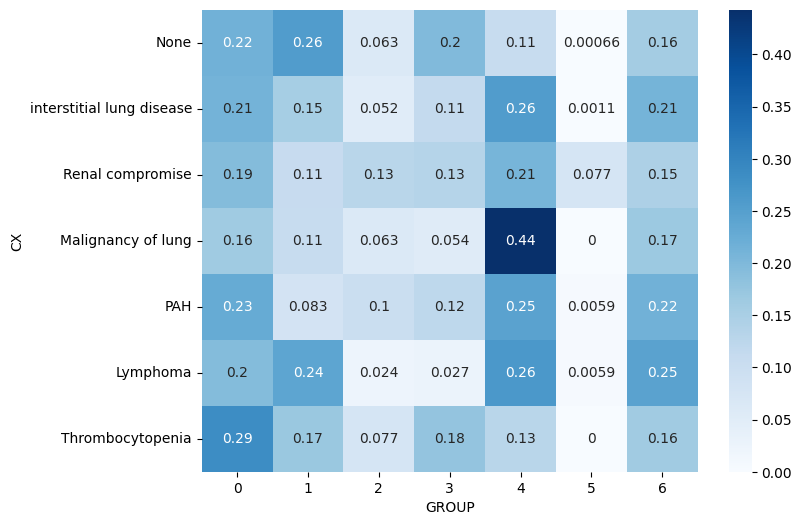

In [8]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cluster_by_group, annot=True, cmap='Blues', cbar=True, xticklabels=group_name, yticklabels=cx_name)

ax.set_xlabel('GROUP')
ax.set_ylabel('CX')

plt.show()

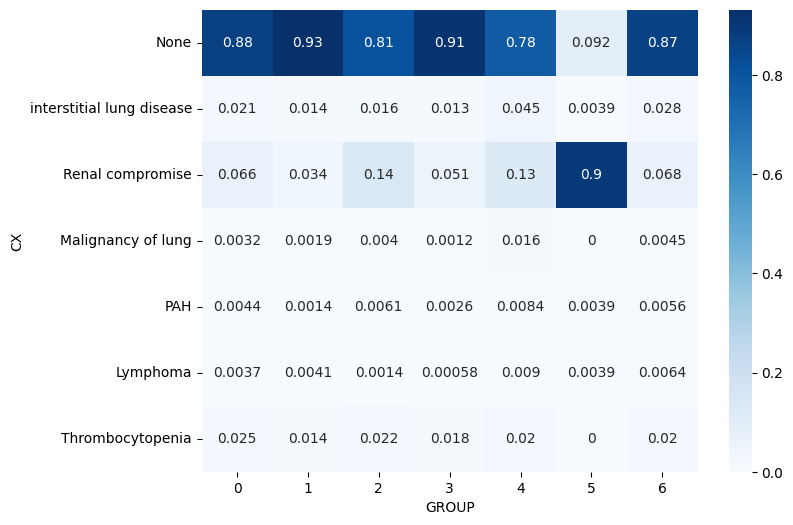

In [9]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cluster_by_cx, annot=True, cmap='Blues', cbar=True, xticklabels=group_name, yticklabels=cx_name)

ax.set_xlabel('GROUP')
ax.set_ylabel('CX')

plt.show()

## Interactive TSNE trajectory plot

In [10]:
from sklearn.manifold import TSNE

In [13]:
x_corpus = np.load('../temp_model/[RD74--TE__pp_single_mark-concat-d1]/data/x_corpus.npz')['arr_0']
idcode = np.load('../temp_model/[RD74--TE__pp_single_mark-concat-d1]/data/idcode.npz')['arr_0']
cluster = np.load('../temp_model/[RD74--TE__pp_single_mark-concat-d1]/data/cluster.npz')['arr_0']
label = np.load('../temp_model/[RD74--TE__pp_single_mark-concat-d1]/data/label.npz')['arr_0']

In [14]:
np.max(idcode)

11075.0

In [15]:
IDCODE = 299
print(cluster[idcode == IDCODE])
print(label[idcode == IDCODE])

[0. 1. 1. 1. 2. 1. 0. 1. 6. 1. 1.]
[0 0 0 0 0 2 2 0 0 0 0]


Text(0, 0.5, 't-SNE component 2')

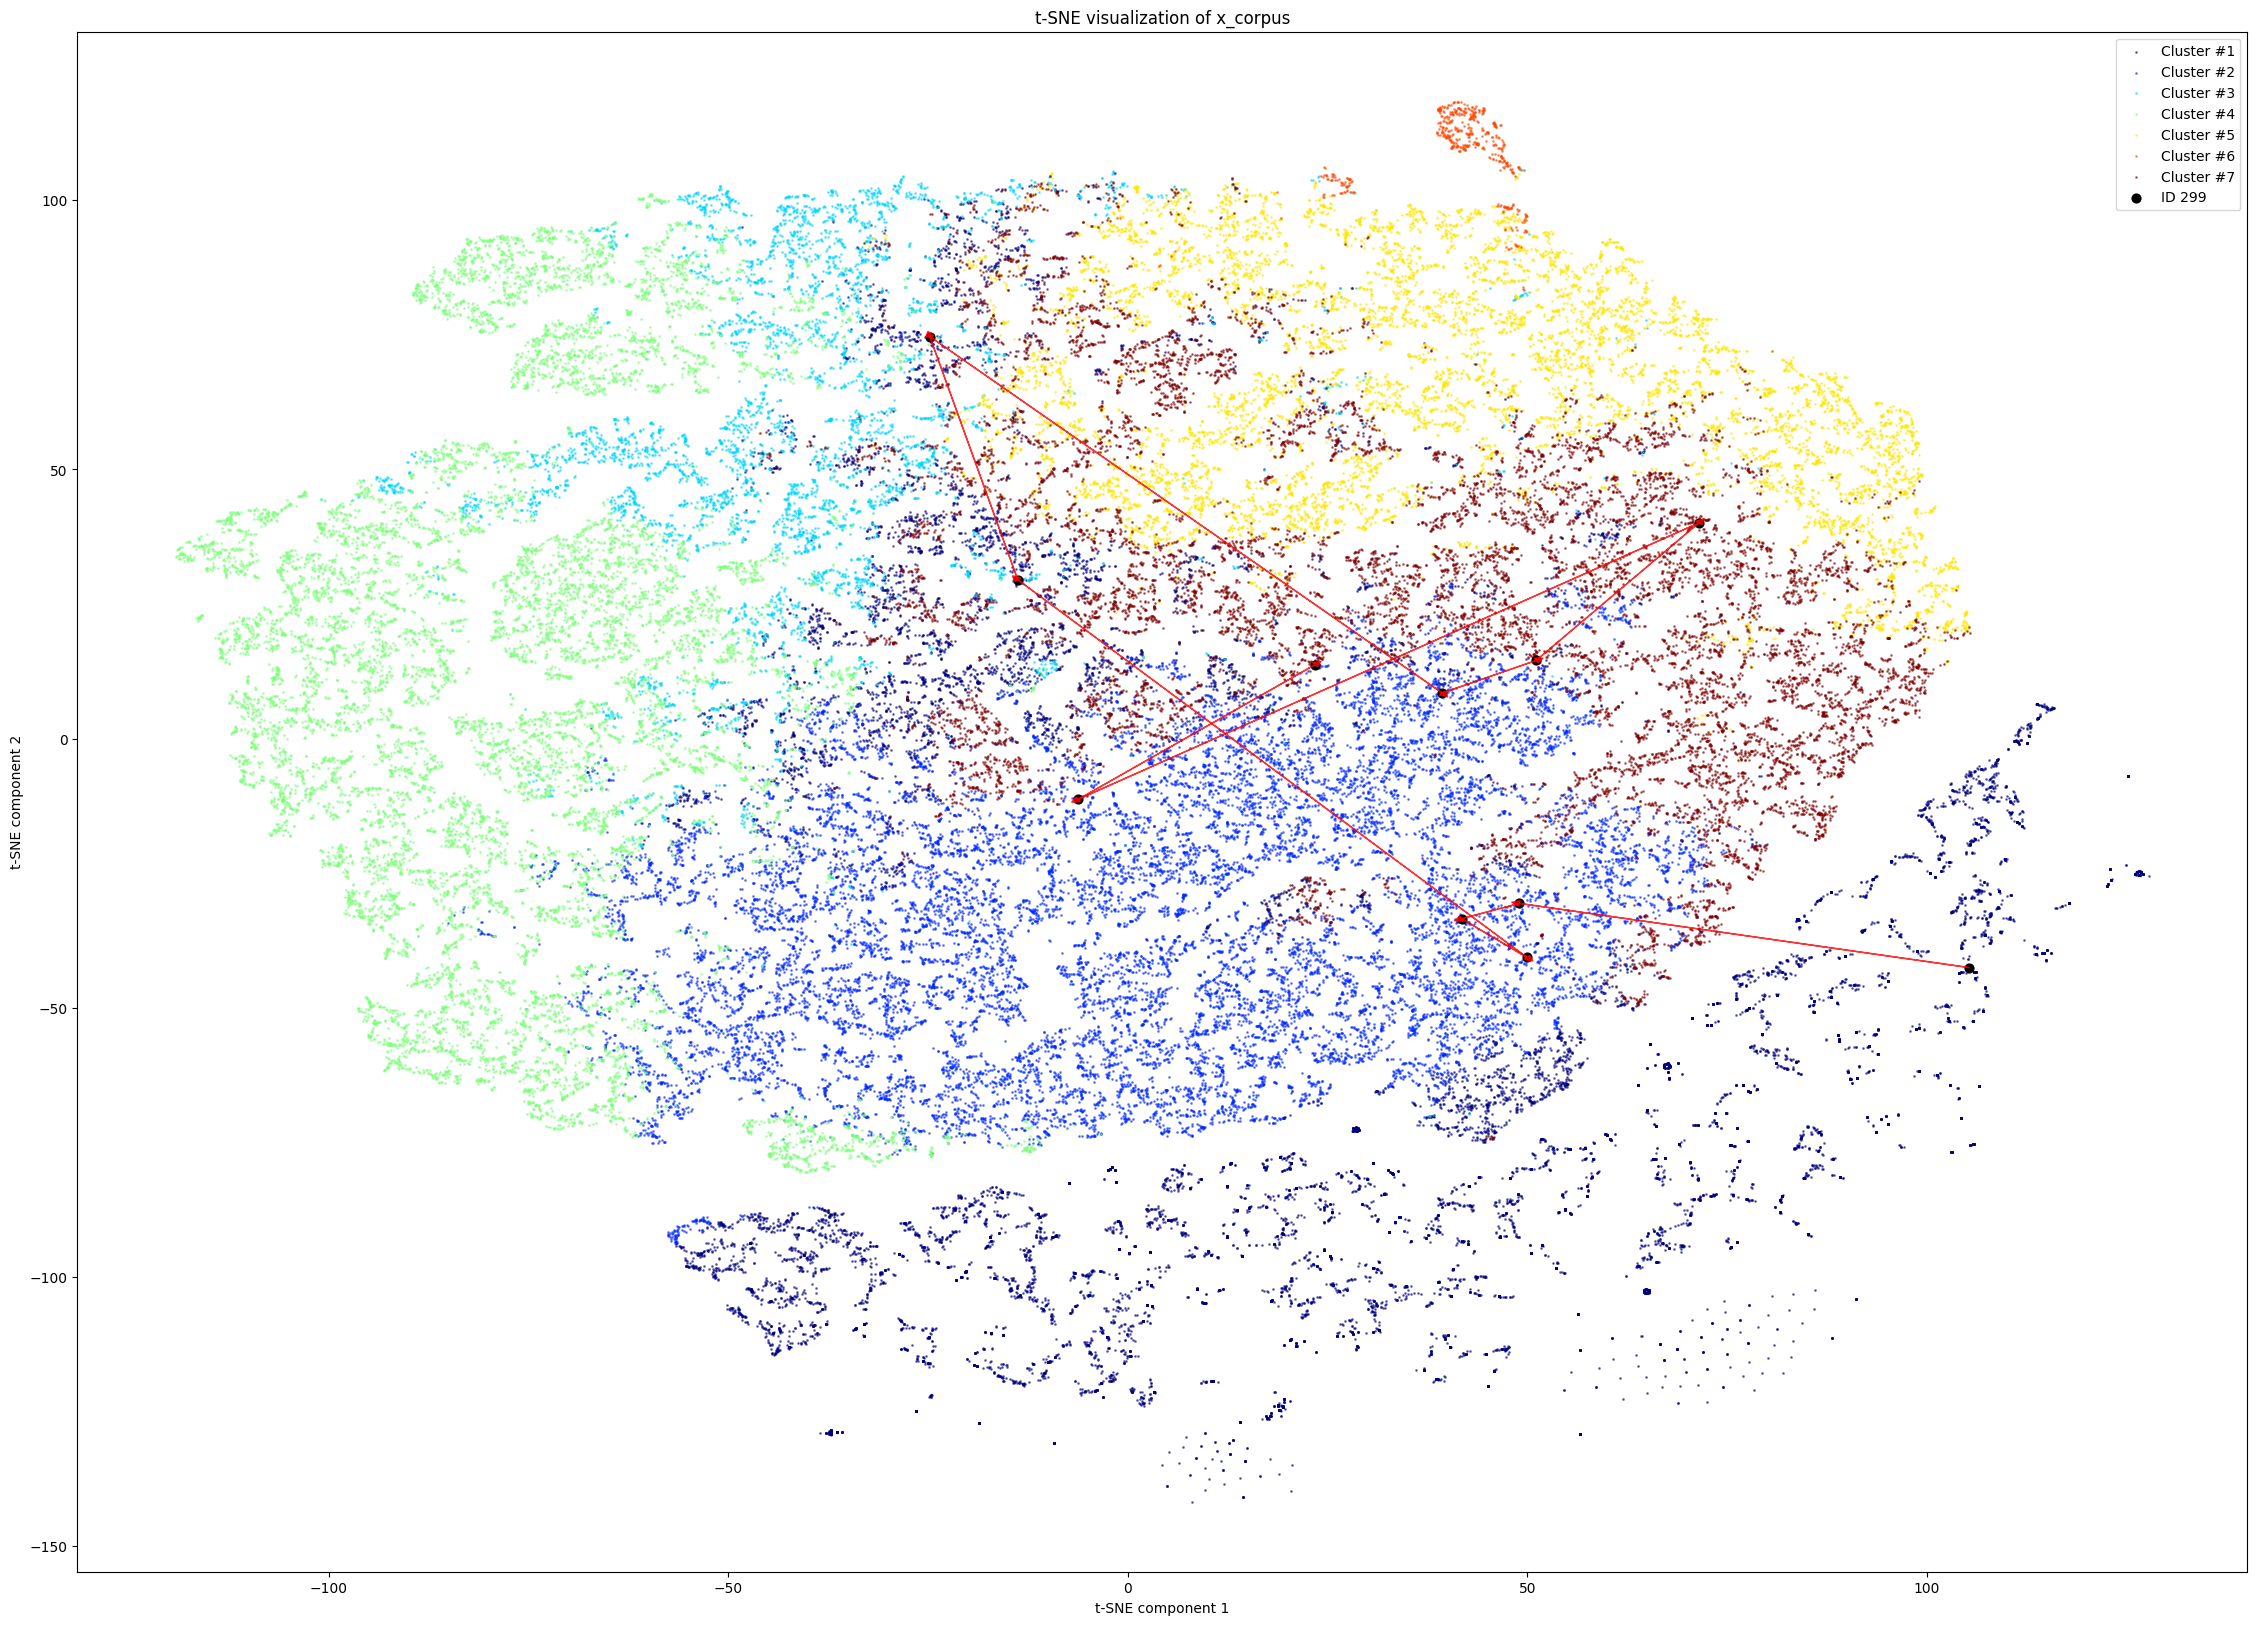

In [16]:
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x_corpus)

plt.figure(figsize=(28, 20))

cx_name = [f"Cluster #{i}" for i in range(1, 8)]

unique_clusters = np.unique(cluster)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_clusters)))

for i, unique_cluster in enumerate(unique_clusters):
    plt.scatter(x_tsne[cluster == unique_cluster, 0], x_tsne[cluster == unique_cluster, 1], 
                color=colors[i], label=f'{cx_name[i]}', alpha=0.5, s=1)
    
highlight_points = x_tsne[idcode == IDCODE]
plt.scatter(highlight_points[:, 0], highlight_points[:, 1], color='black', label=f'ID {IDCODE}', alpha=1, s=40)

highlight_indices = np.where(idcode == IDCODE)[0]
for i in range(len(highlight_indices) - 1):
    start_idx = highlight_indices[i]
    end_idx = highlight_indices[i + 1]
    plt.arrow(x_tsne[start_idx, 0], x_tsne[start_idx, 1], 
              x_tsne[end_idx, 0] - x_tsne[start_idx, 0], 
              x_tsne[end_idx, 1] - x_tsne[start_idx, 1], 
              color='red', alpha=0.8, head_width=1, head_length=1)

plt.legend()
plt.title('t-SNE visualization of x_corpus')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')